# Decision Tree 
Article to go along with this notebook: [Decision Tree](https://medium.com/@mr.sk12112002/classification-algorithms-3-decision-tree-801d59011780)<br>
Helper functions used can found in this repo - [Low-key-ML](https://github.com/SathyaKrishnan1211/Low-key-ML)<br>
Another useful link: https://scikit-learn.org/stable/modules/tree.html#tree

## Importing the required libraries, datasets,..

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Classification

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [27]:
iris = load_iris()
# getting just the petal length and width columns for visualization purposes
X,y = iris.data[:,2:], iris.target 

In [28]:
# baseline
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

### Visualizing the model

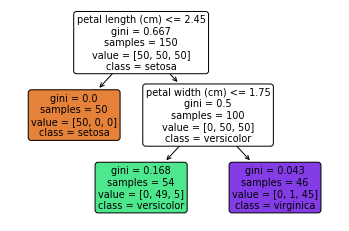

In [29]:
from sklearn import tree
tree.plot_tree(tree_clf,feature_names=iris.feature_names[2:],
               rounded=True,filled=True,class_names=iris.target_names);

In [30]:
iris_df = pd.DataFrame(iris.data[:,2:],columns=["Petal Length","Petal Width"])
iris_df["target"] = y
iris_df.head(10)

,Petal Length,Petal Width,target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
5,1.7,0.4,0
6,1.4,0.3,0
7,1.5,0.2,0
8,1.4,0.2,0
9,1.5,0.1,0


In [31]:
def color_le(val):
  if val<=2.45:
    color = "red"
  else:
    color = "black"
  return "color: %s"%color
iris_df.sample(6).style.applymap(color_le)

,Petal Length,Petal Width,target
135,6.100000,2.300000,2
115,5.300000,2.300000,2
131,6.400000,2.000000,2
55,4.500000,1.300000,1
95,4.200000,1.200000,1
29,1.600000,0.200000,0


**Gini** **impurity**<br>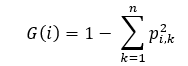

## Gini impurity and entropy

In [32]:
# gini impurity
def gini_impurity(value_set):
  total_num = np.sum(value_set)
  gini = 1
  for j in value_set:
    gini -= (j/total_num)**2
  return np.round(gini,3)

In [33]:
gini_impurity([0,49,5]) # impurity value for the green box in the above plot

0.168

In [34]:
# entropy 
def entropy(value_set):
  total_num = np.sum(value_set)
  ig = 0
  smoothing_term = 10e-7
  for x in value_set:
    p = (x+smoothing_term)/total_num
    ig -= p*np.log2(p)
  return np.round(ig,3)

entropy([0,49,5])

0.445

## Regression

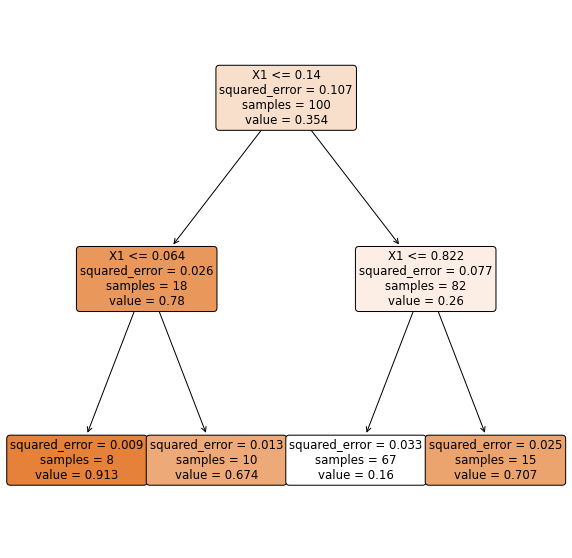

In [35]:
from sklearn.tree import DecisionTreeRegressor

# preparing a quadratic noisy dataset
np.random.seed(42)
X = np.random.rand(100,1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(100, 1) / 10

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

plt.figure(figsize=(10,10))
tree.plot_tree(tree_reg,filled=True,rounded=True,
               feature_names=["X1"]);

## Visualizing the decision boundaries

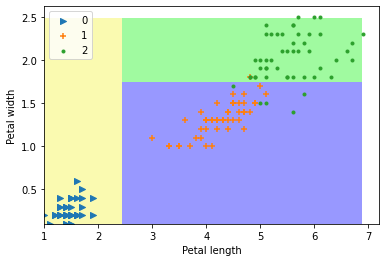

In [36]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf,X,y,resolution=0.02,dataset=None):

  x1,x2 = X[:,0].min(),X[:,0].max()
  y1,y2 = X[:,1].min(),X[:,1].max()
  xx,yy = np.meshgrid(np.arange(x1,x2,resolution),np.arange(y1,y2,resolution))
  Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  classes = np.unique(y)
  markers = ['>', '+', '.', ',', 'o', 'v', 'x', 'X', 'D', '|']

  plt.contourf(xx,yy,Z,cmap=custom_cmap)

  for c in range(len(classes)):
    plt.scatter(X[y==classes[c],0],
             X[y==classes[c],1],
             marker=markers[c],
             label=c)
  plt.legend()

  if dataset=="iris":
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
  else:
    plt.xlabel("$x1$")
    plt.ylabel("$x2$")
plot_decision_boundary(tree_clf,iris.data[:,2:],iris.target,dataset="iris")

## Regularization
Here we will take a look at some of the regularization parameters for Decision Tree classifier.
* max_depth
* min_samples_split
* min_samples_leaf

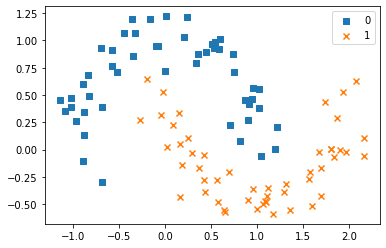

In [37]:
# let's create a moons dataset for testing purposes
from sklearn.datasets import make_moons
X,y = make_moons(100,noise=0.15)

plt.scatter(X[y==0,0],X[y==0,1],marker='s',label=0)
plt.scatter(X[y==1,0],X[y==1,1],marker='x',label=1)
plt.legend();

### Parameter: max_depth

Text(0.5, 1.0, 'max_depth=2')

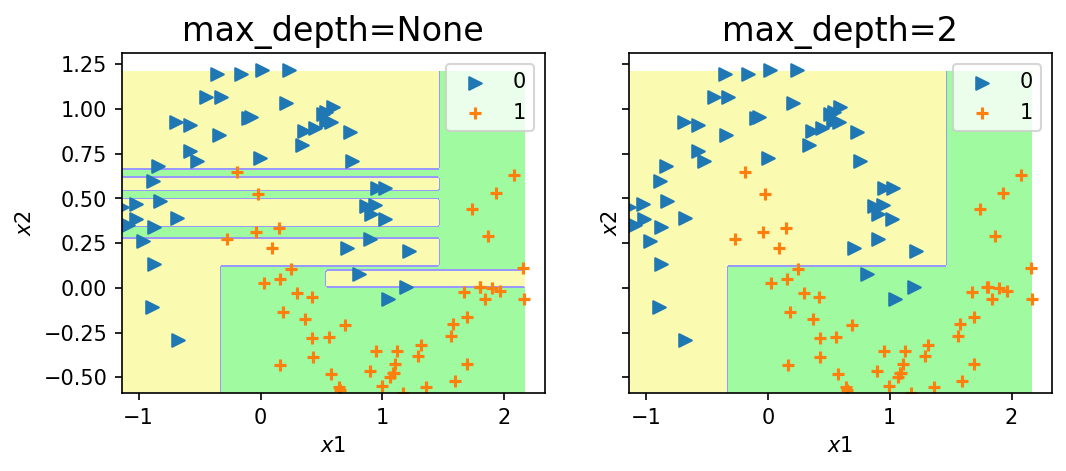

In [38]:
depth_none_clf = DecisionTreeClassifier(max_depth=None)
depth_none_clf = depth_none_clf.fit(X,y)

depth_2_clf = DecisionTreeClassifier(max_depth=2)
depth_2_clf = depth_2_clf.fit(X,y)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=150,sharey=True,figsize=(8,3))
plt.sca(axes[0])
plot_decision_boundary(depth_none_clf,X,y)
plt.title("max_depth=None",fontsize=16)

plt.sca(axes[1])
plot_decision_boundary(depth_2_clf,X,y)
plt.title("max_depth=2",fontsize=16)

The plot on the left shows that with `max_depth=None` the classifier will overfit the training dataset and will not generalize well.<br>
On the other hand, `max_depth=2` gives us a model that will not overfit and will probably generalize well

### Parameter: min_samples_split
min_samples_split is the minimum number of samples a node must have before it can be split. Default value is 2

Text(0.5, 1.0, 'min_samples_split=15')

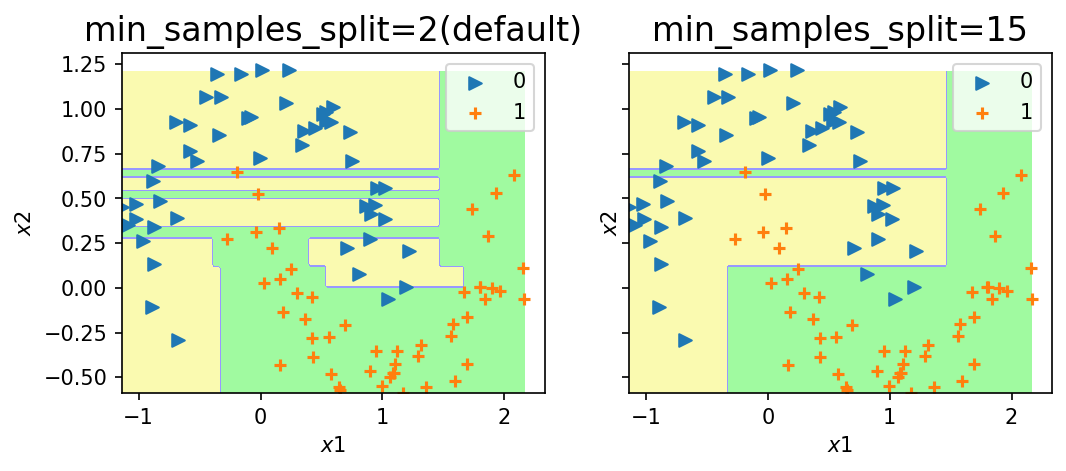

In [39]:
minsample_none_clf = DecisionTreeClassifier()
minsample_none_clf = minsample_none_clf.fit(X,y)

minsample_10_clf = DecisionTreeClassifier(min_samples_split=15)
minsample_10_clf = minsample_10_clf.fit(X,y)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=150,sharey=True,figsize=(8,3))
plt.sca(axes[0])
plot_decision_boundary(minsample_none_clf,X,y)
plt.title("min_samples_split=2(default)",fontsize=16)

plt.sca(axes[1])
plot_decision_boundary(minsample_10_clf,X,y)
plt.title("min_samples_split=15",fontsize=16)

Increasing the min_samples_split reduces overfitting

### Parameter: min_samples_leaf
min_samples_leaf is the minimum number of samples a leaf must have. Default value is 1

Text(0.5, 1.0, 'min_samples_leaf=10')

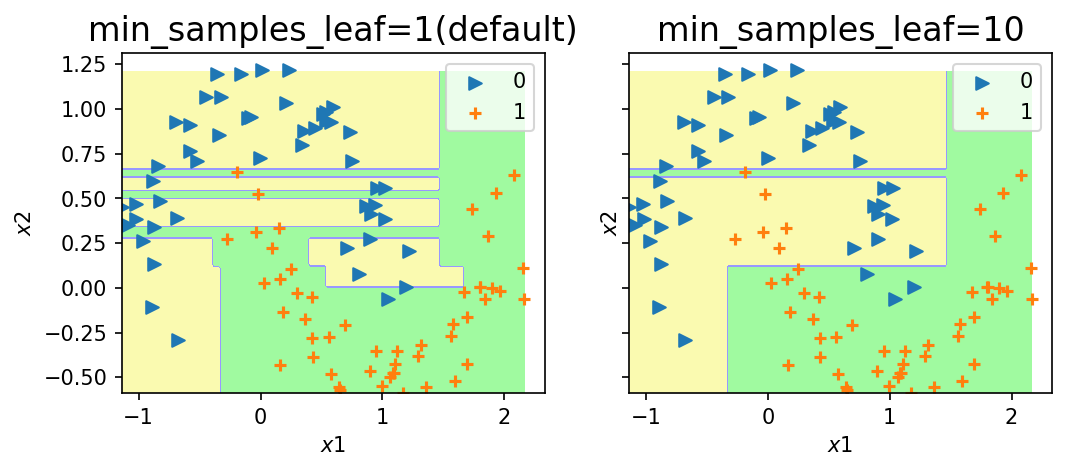

In [42]:
minsampleleaf_none_clf = DecisionTreeClassifier()
minsampleleaf_none_clf = minsampleleaf_none_clf.fit(X,y)

minsampleleaf_10_clf = DecisionTreeClassifier(min_samples_leaf=10)
minsampleleaf_10_clf = minsample_10_clf.fit(X,y)

fig,axes = plt.subplots(nrows=1,ncols=2,dpi=150,sharey=True,figsize=(8,3))
plt.sca(axes[0])
plot_decision_boundary(minsampleleaf_none_clf,X,y)
plt.title("min_samples_leaf=1(default)",fontsize=16)

plt.sca(axes[1])
plot_decision_boundary(minsampleleaf_10_clf,X,y)
plt.title("min_samples_leaf=10",fontsize=16)